In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')
data_train = pd.read_csv('/content/drive/MyDrive/train.csv', index_col='PassengerId')
data_train.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
data_train.groupby("Sex")["Survived"].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

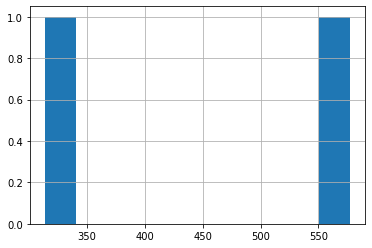

In [7]:
data_train["Sex"].value_counts().hist()

In [8]:
data_train["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

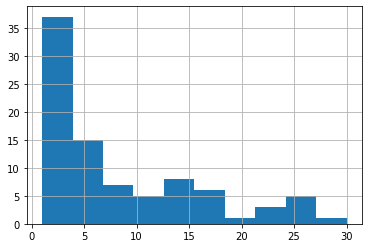

In [9]:
data_train["Age"].value_counts().hist()

In [10]:
data_train=data_train.drop(columns=["Cabin"],axis=1)
data_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S


In [11]:
data_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

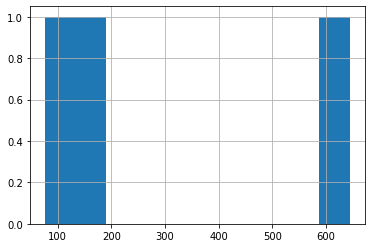

In [12]:
data_train["Embarked"].value_counts().hist()

In [13]:
women = data_train.loc[data_train.Sex == 'female']["Survived"]
rate_women = sum(women) / len(women)

print("% выживших женщин:", rate_women)

% выживших женщин: 0.7420382165605095


In [14]:
men = data_train.loc[data_train.Sex == 'male']["Survived"]
rate_men = sum(men) / len(men)

print("% выживших мужчин:", rate_men)

% выживших мужчин: 0.18890814558058924


In [18]:
data_train=data_train.drop(columns=["Name","Ticket"],axis=1)
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


In [19]:
target = ["Survived"]
colums_train = ['Pclass', 'Sex', 'Age', 'Fare']

In [20]:
X = data_train[colums_train]
Y = data_train[target]

*Проверка на пустые ячейки*

In [21]:
X['Pclass'].isnull().sum()

0

In [22]:
X['Sex'].isnull().sum()

0

In [23]:
X['Age'].isnull().sum()

177

In [24]:
X['Fare'].isnull().sum()

0

*Заполняем пустые ячейки медианным значением по возрасту*

In [28]:
X.groupby("Pclass")["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [29]:
def Age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38.23
        elif Pclass == 2:
            return 29.87
        elif Pclass == 3:
            return 25.14
    else:
        return Age

In [33]:
X.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

*Заменим колонку Sex нулями и единицами, вместо мужчин и женщин*

In [34]:
d = {'male': 0, 'female': 1}

In [35]:
X['Sex'] = X['Sex'].apply(lambda x:d[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
X

,Pclass,Sex,Age,Fare
PassengerId,,,,
1,3,0,22.00,7.2500
2,1,1,38.00,71.2833
3,3,1,26.00,7.9250
4,1,1,35.00,53.1000
5,3,0,35.00,8.0500
...,...,...,...,...
887,2,0,27.00,13.0000
888,1,1,19.00,30.0000
889,3,1,25.14,23.4500


*Разделим выборку на обучающее и тестовое множество в соотношении 70:30*

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33)

*Нормировка данных*

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Логистическая регрессия


---


*Для логистической регрессии гиперпараметры как правило не так сильно влияют на результат. Запускаем её с параметрами по умолчанию.*

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve

In [66]:
def plot_roc_curve(model, X_train, X_test, y_train, y_test):
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    plt.figure(figsize=(12,10))

    print(f'Train roc-auc: {roc_auc_score(y_train, y_train_proba)}')
    print(f'Test roc-auc: {roc_auc_score(y_test, y_test_proba)}')


    plt.plot(*roc_curve(y_train, y_train_proba)[:2], label='train roc-curve')
    plt.plot(*roc_curve(y_test, y_test_proba)[:2], label='test roc-curve')

    plt.plot([0,1], [0,1], linestyle='--', color='black')
    plt.grid(True)
    plt.legend()
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train roc-auc: 0.8441135106788711
Test roc-auc: 0.8488901812542405


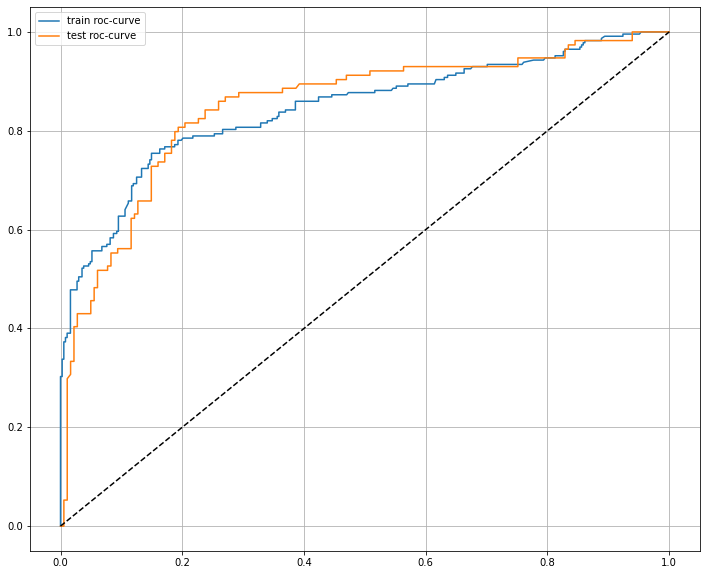

In [67]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train, y_train)
plot_roc_curve(model, X_train, X_test, y_train, y_test)

## Выбор модели, подбор гиперпараметра
Для подбора оптимального гиперпараметра будем использовать перебор параметра по сетке. Качество будем измерять с помощью кросс-валидации. 

Суть метода кросс-валидации схематично изображена на картинке.
![alt text](https://drive.google.com/uc?id=1cS2AoSrcG5sCGbnKhkv3ZYqKSmtPd-XM)


Напишем функцию, визуализирующую поиск оптимального гиперпараметра модели по сетке. Для этого используем метод GridSearchCV из sklearn.model_selection.

In [44]:
from sklearn.model_selection import GridSearchCV

In [68]:
def search(X, Y, model, param_name, grid, draw=True):
    parameters = {param_name: grid}
    
    CV_model = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='roc_auc', n_jobs=-1)
    CV_model.fit(X, Y)
    means = CV_model.cv_results_['mean_test_score']
    error = CV_model.cv_results_['std_test_score']
    
    if draw:
        plt.figure(figsize=(15,8))
        plt.title('choose ' + param_name)


        plt.plot(grid, means, label='mean values of score')

        plt.fill_between(grid, means - 2 * error, means + 2 * error, color='green', label='deviation area between errors')
        plt.legend()
        plt.xlabel('parameter')
        plt.ylabel('roc_auc')
        plt.show()
        
    return means, error

*Протестируем функцию на KNN и решающем дереве*

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


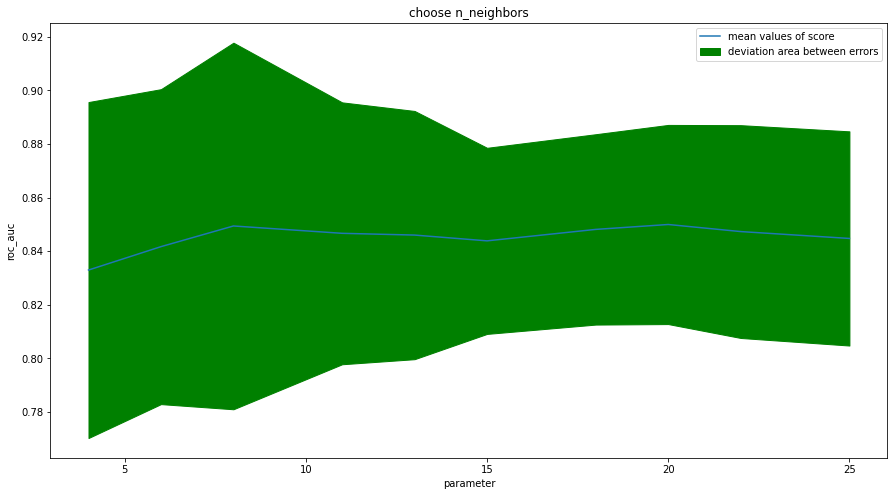

In [69]:
models = [KNeighborsClassifier(n_jobs=-1)]
param_names = ['n_neighbors']
grids = [np.array(np.linspace(4, 25, 10), dtype='int')]
param_scales = ['ordinary']

for model, param_name, grid, param_scale in zip(models, 
                                                param_names, 
                                                grids, 
                                                param_scales):
    search(X_train, y_train, model, param_name, grid, param_scale)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train roc-auc: 0.8756257151029748
Test roc-auc: 0.8593583406028884


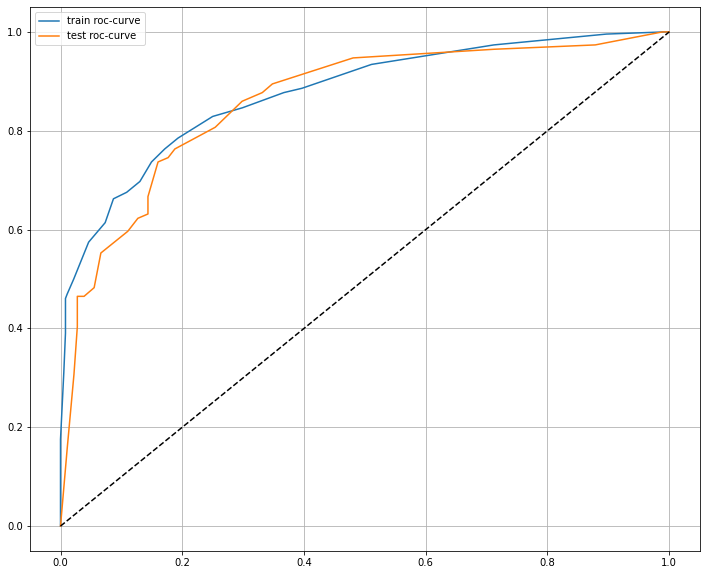

In [70]:
model = KNeighborsClassifier(n_neighbors=25, n_jobs=-1).fit(X_train, y_train)
plot_roc_curve(model, X_train, X_test, y_train, y_test)

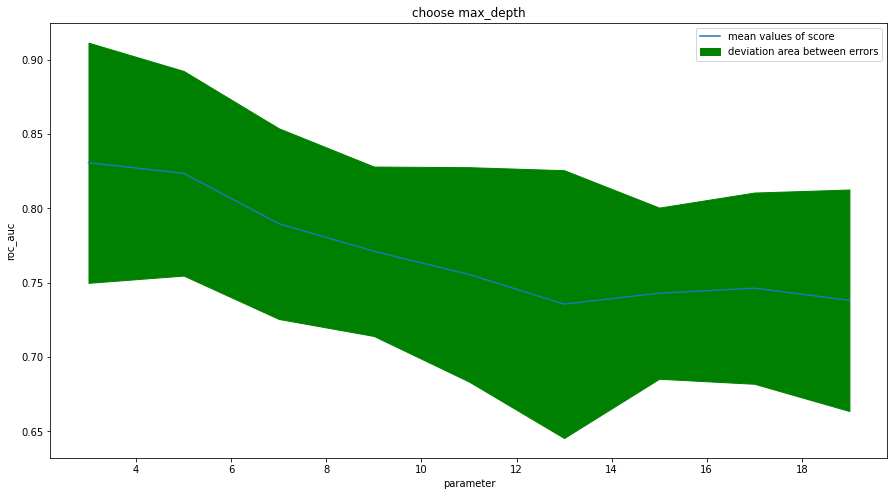

In [71]:
models = [DecisionTreeClassifier()]
param_names = ['max_depth']
grids = [np.arange(3, 21, 2)]
param_scales = ['ordinary']

for model, param_name, grid, param_scale in zip(models, 
                                                param_names, 
                                                grids, 
                                                param_scales):
    search(X_train, y_train, model, param_name, grid, param_scale) 

Train roc-auc: 0.9409563310450039
Test roc-auc: 0.8362896190753126


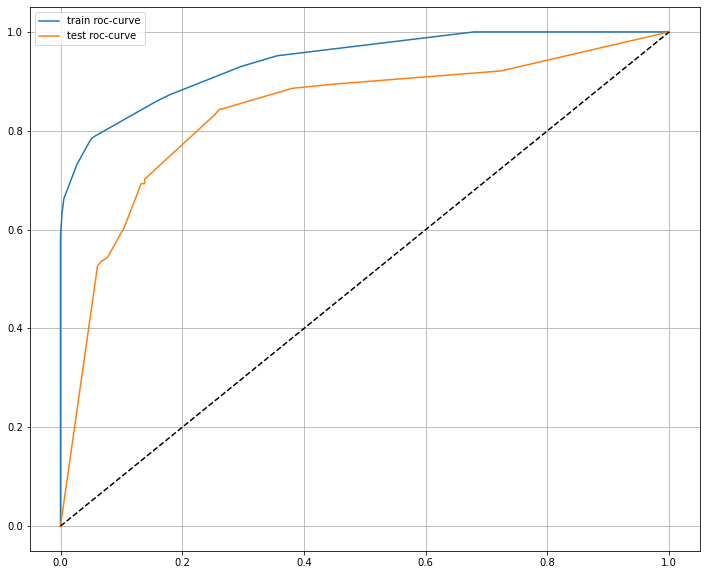

In [72]:
model = DecisionTreeClassifier(max_depth=7).fit(X_train, y_train)
plot_roc_curve(model, X_train, X_test, y_train, y_test)

### Случайный лес


---


*Подберём параметр n_estimators в алгоритме случайный лес. Известно, что случайный лес не переобучается. Поэтому график качества будет монотонно возрастать. Следовательно, необходимо найти минимальное значение n_estimators, при котором качество не изменяется. 
Поскольку каждое дерево обучается независимо от остальных, достаточно обучить сразу лес из большого количества деревьев, а затем рассмотреть подмножества нужного размера из исходного множества деревьев.*

*Мы не будем так делать ввиду излишней сложности получаемого кода*

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
models = [RandomForestClassifier(n_jobs=-1)]
param_names = ['n_estimators']
grids = [[10, 20, 30, 50, 75, 100, 150]]
param_scales = ['ordinary']

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


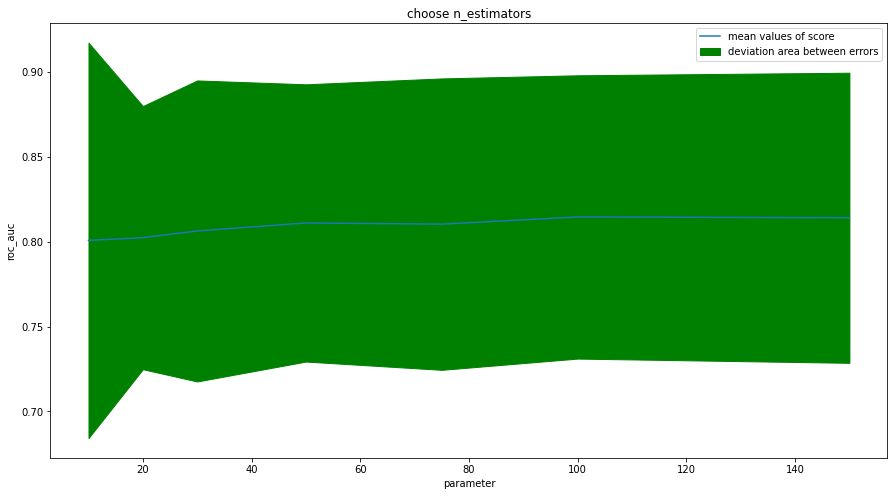

In [56]:
for model, param_name, grid, param_scale in zip(models, 
                                                param_names, 
                                                grids, 
                                                param_scales):
    search(X_train, y_train, model, param_name, grid, param_scale)

*Как и следовало ожидать, случайный лес побил оба предыдущих алгоритма. Вычислим итоговое качество на test*

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Train roc-auc: 0.9980036708619374
Test roc-auc: 0.8805127459532809


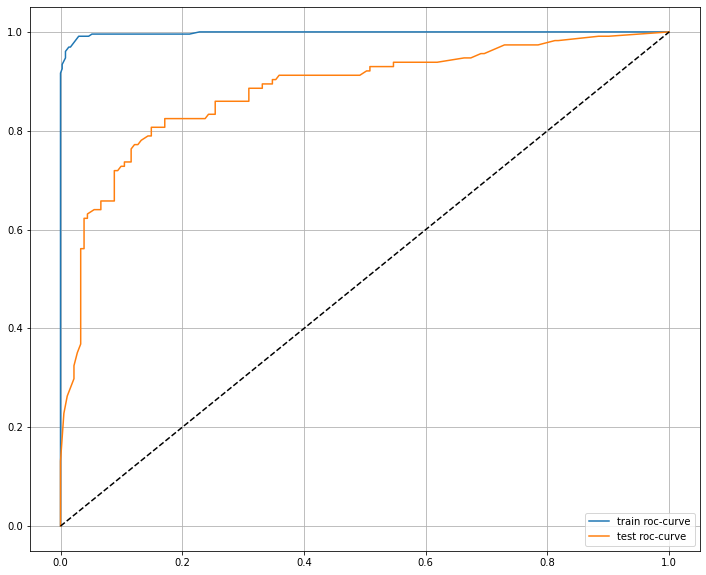

In [73]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1).fit(X_train, y_train)
plot_roc_curve(model, X_train, X_test, y_train, y_test)